##  Week6 복습과제
### 1. HR_employee_data 를 이용한 마찰("Attrition") 여부를 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#### 1.1 문제와 같이 제시된 'HR_employee_data.csv'를 읽어와 HR에 저장하시오

In [2]:
import pandas as pd
HR=pd.read_csv("HR_employee_data.csv")

#### 1.2 HR 데이터의 상위 5 행을 통해 데이터를 파악하시오

In [3]:
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 1.3 HR 데이터를 describe()함수를 사용해서 의미 없어 보이는 값을 파악하시오.

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


#### 1.4 위 describe() 함수를 사용한 결과  'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours' 열이 의미가 없어 보입니다.
- HR 데이터 셋에서 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours' 열들을 삭제하시오. 

In [5]:
HR.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [6]:
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### 1.5 'Attrition'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.)

In [7]:
HR['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

#### 1.6 HR 데이터의 'Attrition'열의 문자열 속성값을 1과 0의 값으로 바꾸시오.
- 'Yes'는 1로 'No'는0으로 

In [8]:
HR['Attrition'] = HR.Attrition.astype("category").cat.codes

In [9]:
HR['Attrition'].unique()

array([1, 0], dtype=int8)

#### 1.7 HR 데이터를 correlation을 heatmap으로 나타내고 TotalWorkingYears와 상관성이 가장 높은 상위 3 변수를 적으시오. 

<AxesSubplot:>

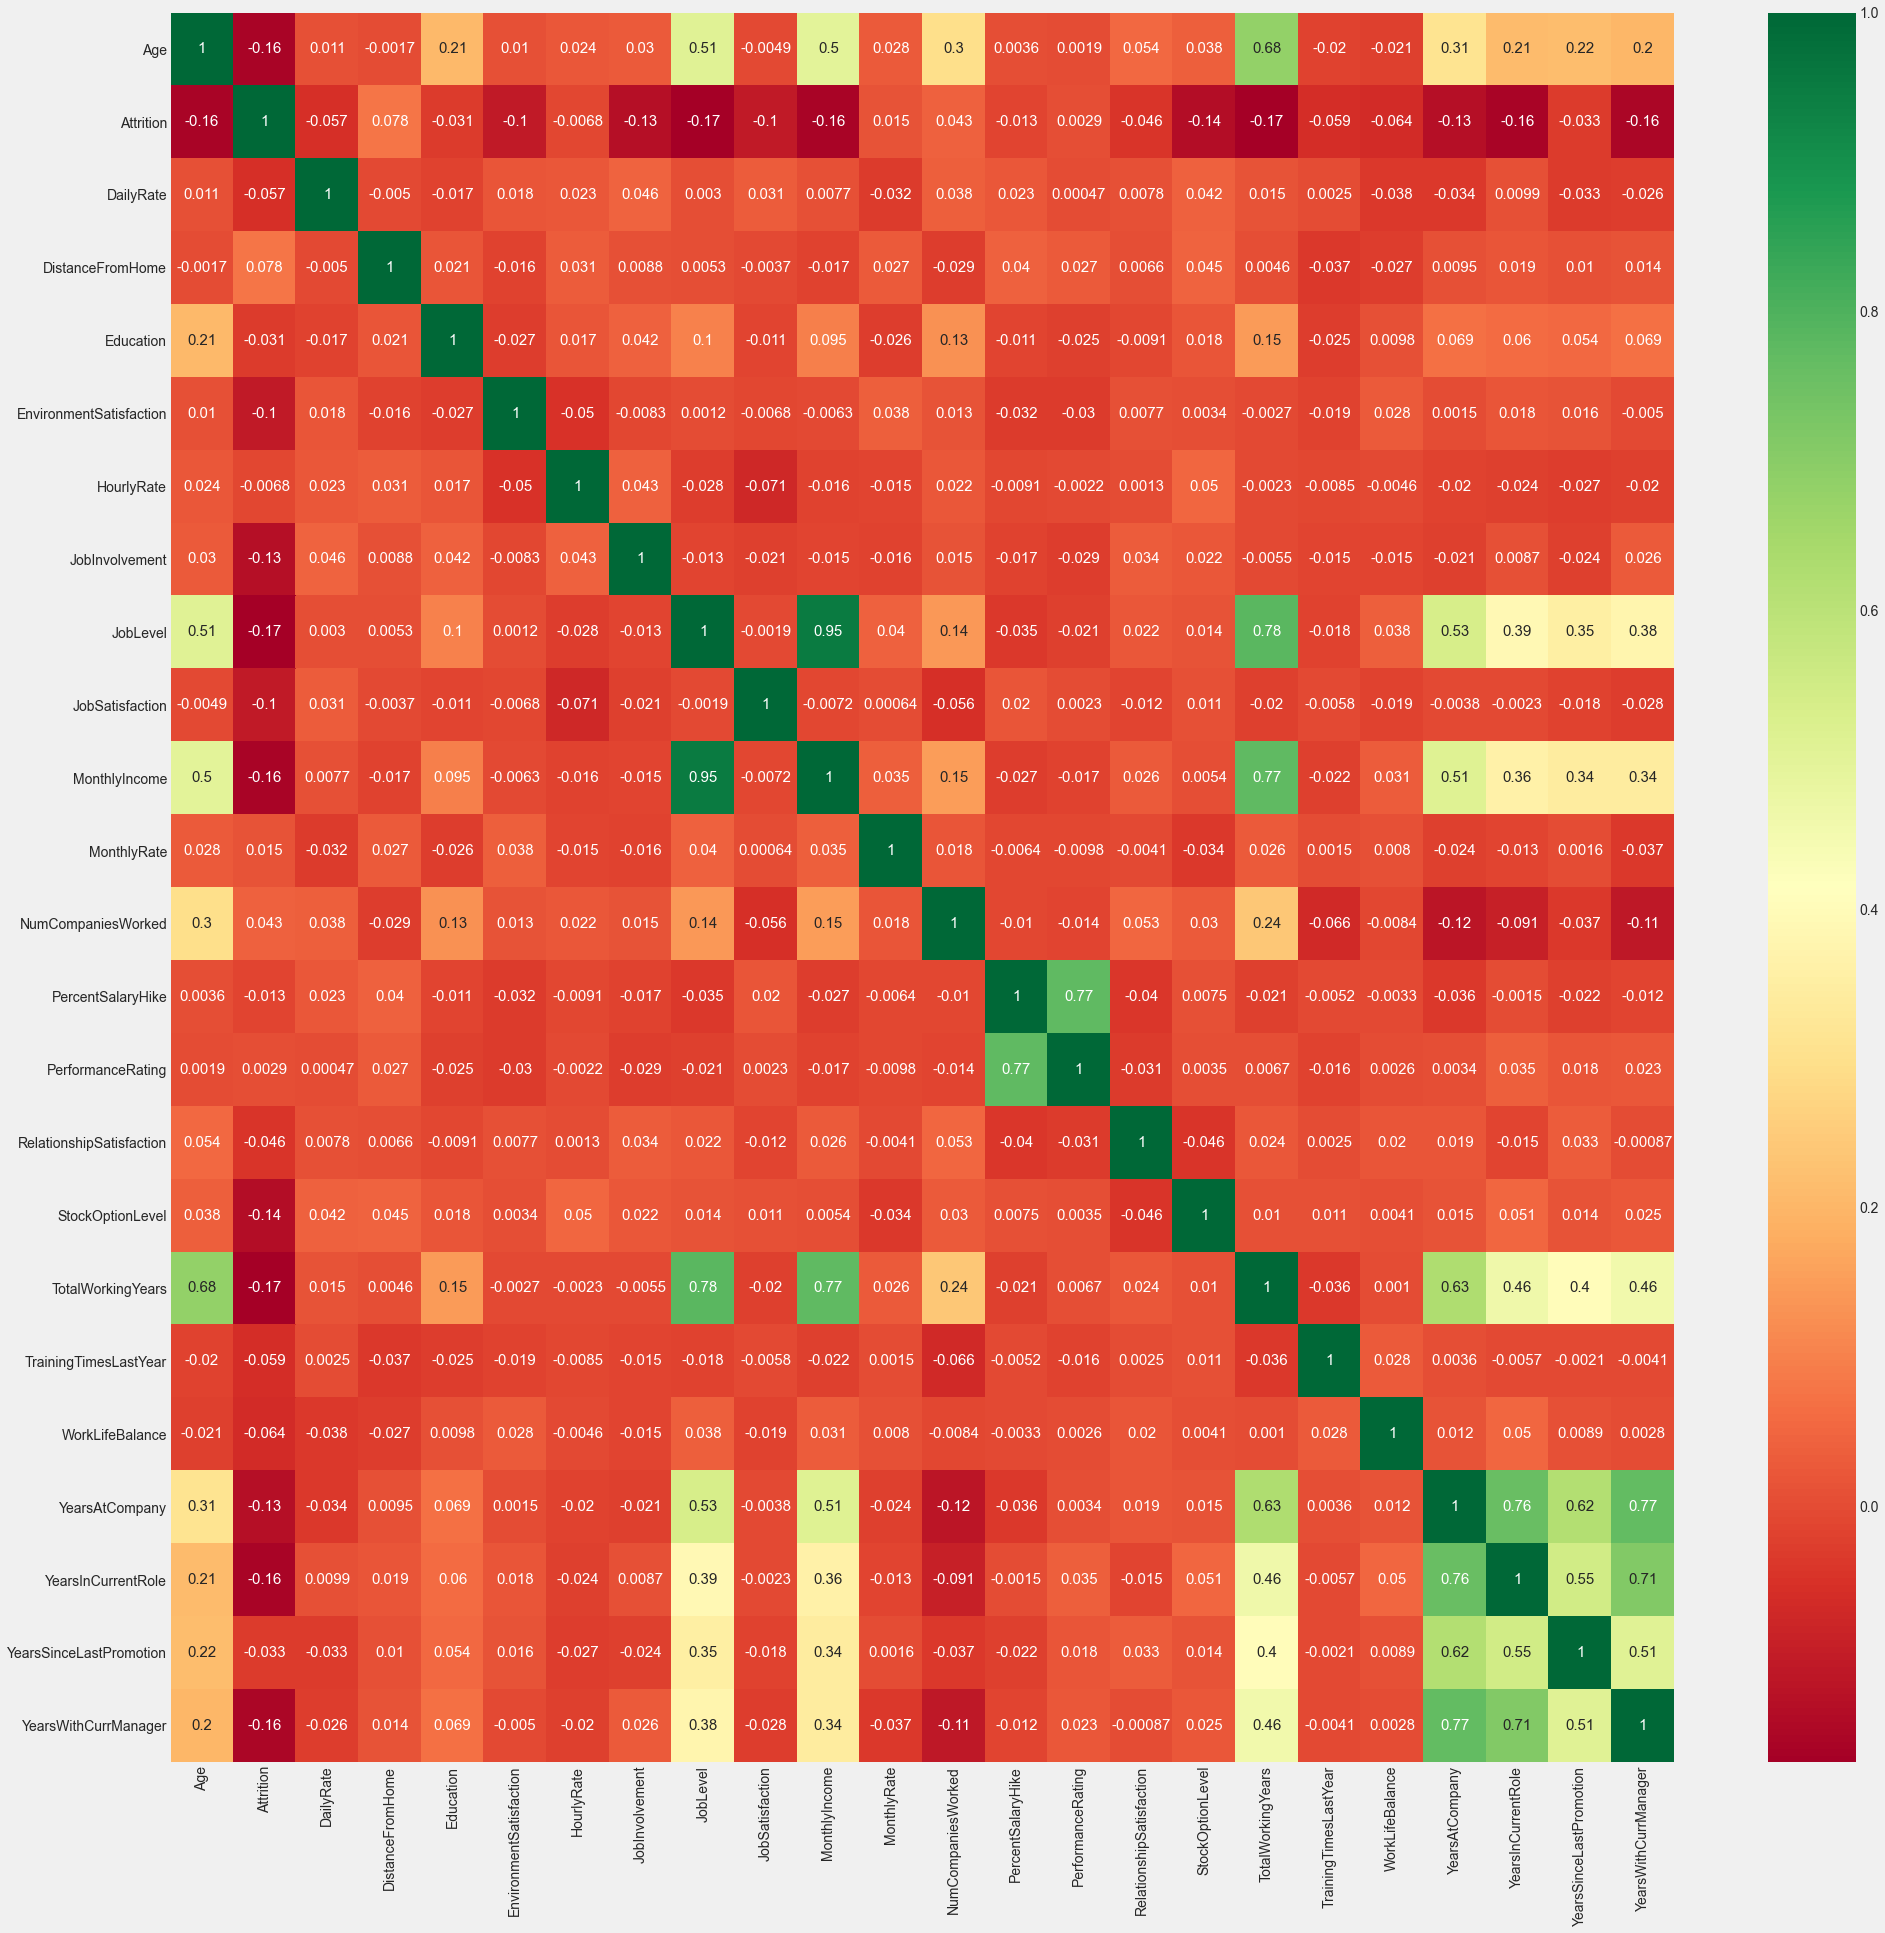

In [10]:
plt.figure(figsize=(30, 30))
sns.heatmap(HR.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

답 : Age, JobLevel, MonthlyIncome

#### 1.8 독립변수(X)와 종속변수(y) 분리 및 인코딩 
- y에 'Attrition' 열에 해당하는 값을, X에 나머지 변수들을 저장하시오.
- LabelEncdoer를 이용해 categorical 변수에 대해 인코딩을 하시오.
- X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.3, random_state=42)

In [11]:
# HR.info() -> 명목변수 확인

In [12]:
from sklearn.model_selection import train_test_split

X = HR.drop('Attrition', axis=1)
y = HR.Attrition

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']:
    X[column] = label.fit_transform(X[column])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


#### 1.9 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
- DecisionTreeClassifer 의 random_state=42

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

pred = tree_clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.5f}%")
  

Accuracy Score: 77.77778%


#### 1.10 RandomForestClassifier를 사용해 훈련데이터를 fit 한 후, <br>테스트 셋으로 예측의 정확도를 구하고<br> 앞의 문제와 비교해 성능이 향상되었는 지 살펴보시오
- 조건 : Forest의 tree 개수를 100개로 제한하시오

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.5f}%")

Accuracy Score: 86.16780%


#### 1.11 결정트리를 기반으로 하는 AdaBoostClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오
-DecisionTreeClassifier의 max_depth=1, n_estimators=30,algorithm="SAMME.R",learning_rate=0.01

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30, 
                        algorithm="SAMME.R",
                        learning_rate=0.01)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.5f}%")

Accuracy Score: 86.16780%


-위와 같은 조건으로 learning_rate=1일 때의 예측의 정확도를 구해 위의 결과와 비교하시오.

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=30, 
                        algorithm="SAMME.R",
                        learning_rate=1)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.5f}%")

Accuracy Score: 86.84807%


#### 1.12 GradientBoostingClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오
-max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=50, learning_rate=1.0, random_state=42)
gbc.fit(X_train, y_train) 

gbc_pred=gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print('GBM Accuracy score: {:.4f}'.format(gbc_accuracy))

GBM Accuracy score: 0.8730


#### 1.13 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

param_grid = {
    'n_estimators' : [30,40, 50, 70, 80, 90, 100],
    'learning_rate' : [0.1, 0.5, 1.0]
}

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [30,40, 50, 70, 80, 90, 100],
    'learning_rate' : [0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid) 
grid_search.fit(X_test, y_test)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [30, 40, 50, 70, 80, 90, 100]})

In [20]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 40}

-GridSearchCV를 이용해 최적으로 학습된 estimators로 예측을 수행하시오

In [21]:
gb_pred = grid_search.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM Accuracy score: {:.4f}'.format(gb_accuracy))

GBM Accuracy score: 0.9546


#### 1.14 파이썬의 XGBClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오 
-use_label_encoder=False, eval_metric='mlogloss', random_state=42 

In [25]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=42) 
xgb.fit(X_train, y_train)
xgb_pred=xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('XGB Accuracy score: {:.4f}'.format(xgb_accuracy))

XGB Accuracy score: 0.8571


#### 1.15 LGBMClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오 
-random_state=42 

In [28]:
from lightgbm import LGBMClassifier

In [30]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred=lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('LGBM Accuracy score: {:.4f}'.format(lgbm_accuracy))

LGBM Accuracy score: 0.8707
